In [32]:
# import frogress
import pandas as pd
import numpy as np
import sys
from subprocess import call
from scipy.spatial import cKDTree
from astropy.cosmology import FlatLambdaCDM
import glob
from astropy.io import fits
import healpy as hp
import numpy as np;
import astropy.io.fits as pyfits;
from pylab import *
from astropy.coordinates import SkyCoord
import astropy.units as u

from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=100, Om0=0.3)


In [10]:
import numpy as np
import matplotlib.pyplot as plt

mirr_rbins = np.loadtxt('Annular_radius_0.3_0.6/GalaxySFRHM_mirror', usecols=(0))
mirr_jackid = np.loadtxt('Annular_radius_0.3_0.6/GalaxySFRHM_mirror', usecols=(1))
mirr_ra = np.loadtxt('Annular_radius_0.3_0.6/GalaxySFRHM_mirror', usecols=(2))

rbins = np.loadtxt('Annular_radius_0.3_0.6/GalaxySFRHM', usecols=(0))
jackid = np.loadtxt('Annular_radius_0.3_0.6/GalaxySFRHM', usecols=(1))
ra = np.loadtxt('Annular_radius_0.3_0.6/GalaxySFRHM', usecols=(2))


rm_mirr_rbins = np.loadtxt('Annular_radius_0.3_0.6/RandomSFRHM_mirror', usecols=(0))
rm_mirr_jackid = np.loadtxt('Annular_radius_0.3_0.6/RandomSFRHM_mirror', usecols=(1))
rm_mirr_ra = np.loadtxt('Annular_radius_0.3_0.6/RandomSFRHM_mirror', usecols=(2))

rm_rbins = np.loadtxt('Annular_radius_0.3_0.6/RandomSFRHM', usecols=(0))
rm_jackid = np.loadtxt('Annular_radius_0.3_0.6/RandomSFRHM', usecols=(1))
rm_ra = np.loadtxt('Annular_radius_0.3_0.6/RandomSFRHM', usecols=(2))


print(mirr_rbins[:10])


[0.7042261 0.7042261 0.7042261 0.7042261 0.7042261 0.7042261 0.7042261
 0.7042261 0.7042261 0.7042261]


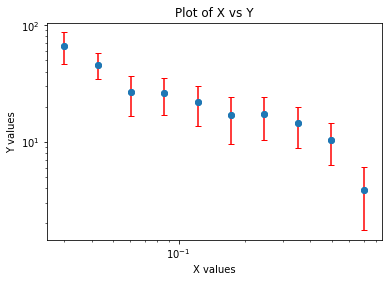

In [26]:
import matplotlib.pyplot as plt

rb  = np.logspace(np.log10(0.03), np.log10(1.0), 11)
rb = rb[:10]

mirr_points = np.zeros((10, 42))
sat_points = np.zeros((10, 42))
rm_mirr_points = np.zeros((10, 42))
rm_sat_points = np.zeros((10, 42))
Nsat = np.zeros((10, 42))
for i in range(len(rb)):
    for k in range(42):
        idx1 = np.logical_and((abs(mirr_rbins - rb[i])) <= 0.001, mirr_jackid != [k])
        mirr_points[i][k] = np.sum(idx1)
        idx2 = np.logical_and((abs(rbins - rb[i])) <= 0.001, jackid != [k])
        sat_points[i][k] = np.sum(idx2)
        Nsat[i][k] = len(np.unique(ra[idx2]))
        
        idx1 = np.logical_and((abs(rm_mirr_rbins - rb[i])) <= 0.001, rm_mirr_jackid != [k])#, mirr_jackid != -1)
        rm_mirr_points[i][k] = np.sum(rm_mirr_ra[idx1])
        idx2 = np.logical_and((abs(rm_rbins - rb[i])) <= 0.001, rm_jackid != [k])#,  jackid != -1)
        rm_sat_points[i][k] = np.sum(rm_ra[idx2])

xi = np.zeros(10)
stdxi = np.zeros(10)

chi = np.zeros((10, len(sat_points[i]))) # will be used to make covariance matrix

for rr in range(len(sat_points)):
    for kk in range(len(sat_points[i])):
        
        chi[rr][kk] = ((sat_points[rr][kk]/rm_sat_points[rr][kk])-(mirr_points[rr][kk]/rm_mirr_points[rr][kk]))
    xi[rr] = np.mean(chi[rr])
    stdxi[rr] = np.std(chi[rr])*np.sqrt(41)
 
# Create a plot of the data
plt.xscale('log')
plt.yscale('log')
plt.scatter(rb, xi)
plt.errorbar(rb, xi, yerr=stdxi, fmt='o', ecolor='red', capsize=3)
# plt.ylim(0.000001, 1)
# Add labels and title to the plot
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Plot of X vs Y')

# Show the plot
plt.show()


In [27]:
rb

array([0.03      , 0.04259995, 0.06049187, 0.08589836, 0.12197554,
       0.17320508, 0.24595095, 0.34924997, 0.49593442, 0.70422611])

In [17]:
mirr_rbins[1000:1050]

array([0.7042261, 0.7042261, 0.34925  , 0.7042261, 0.34925  , 0.7042261,
       0.4959344, 0.7042261, 0.34925  , 0.7042261, 0.34925  , 0.4959344,
       0.2459509, 0.7042261, 0.4959344, 0.7042261, 0.4959344, 0.7042261,
       0.4959344, 0.7042261, 0.34925  , 0.7042261, 0.7042261, 0.7042261,
       0.7042261, 0.7042261, 0.4959344, 0.7042261, 0.4959344, 0.7042261,
       0.4959344, 0.7042261, 0.4959344, 0.7042261, 0.4959344, 0.7042261,
       0.4959344, 0.7042261, 0.4959344, 0.7042261, 0.4959344, 0.7042261,
       0.7042261, 0.34925  , 0.7042261, 0.34925  , 0.7042261, 0.34925  ,
       0.7042261, 0.7042261])

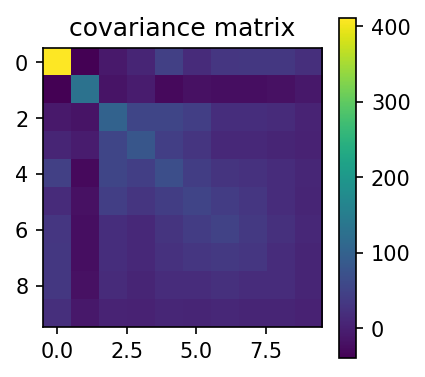

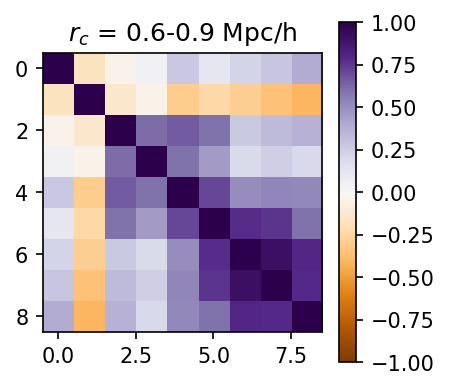

In [28]:
cov_matrix1 = []
for i in range(len(chi)):
    col= []
    for j in range(len(chi)):
        s = 0
        for k in range(len(chi[i])):
            s = s + (chi[i][k]- xi[i])*(chi[j][k]-xi[j])
        col.append(s*(len(chi[i])-1)/(len(chi[i])))
    cov_matrix1.append(col)

Cij = []
for i in range(len(chi)):
    Cij1 = []
    for j in range(len(chi)):
        Cij1.append(cov_matrix1[i][j]/(np.sqrt(cov_matrix1[i][i])*np.sqrt(cov_matrix1[j][j])))
    Cij.append(Cij1)
    
    
plt.figure(figsize=(3,3), dpi=150)
plt.imshow(cov_matrix1)
plt.title('covariance matrix')
plt.colorbar()
plt.savefig("Covmatrix1.jpg")
                    
plt.figure(figsize=(3,3), dpi=150)
plt.imshow(Cij, vmin = -1, vmax = 1, cmap = 'PuOr')
plt.title('$r_c$ = 0.6-0.9 Mpc/h')
plt.colorbar()
plt.savefig("Cij1.jpg")


K: 19.492 ± 8.564
R_s: 0.455 ± 0.233


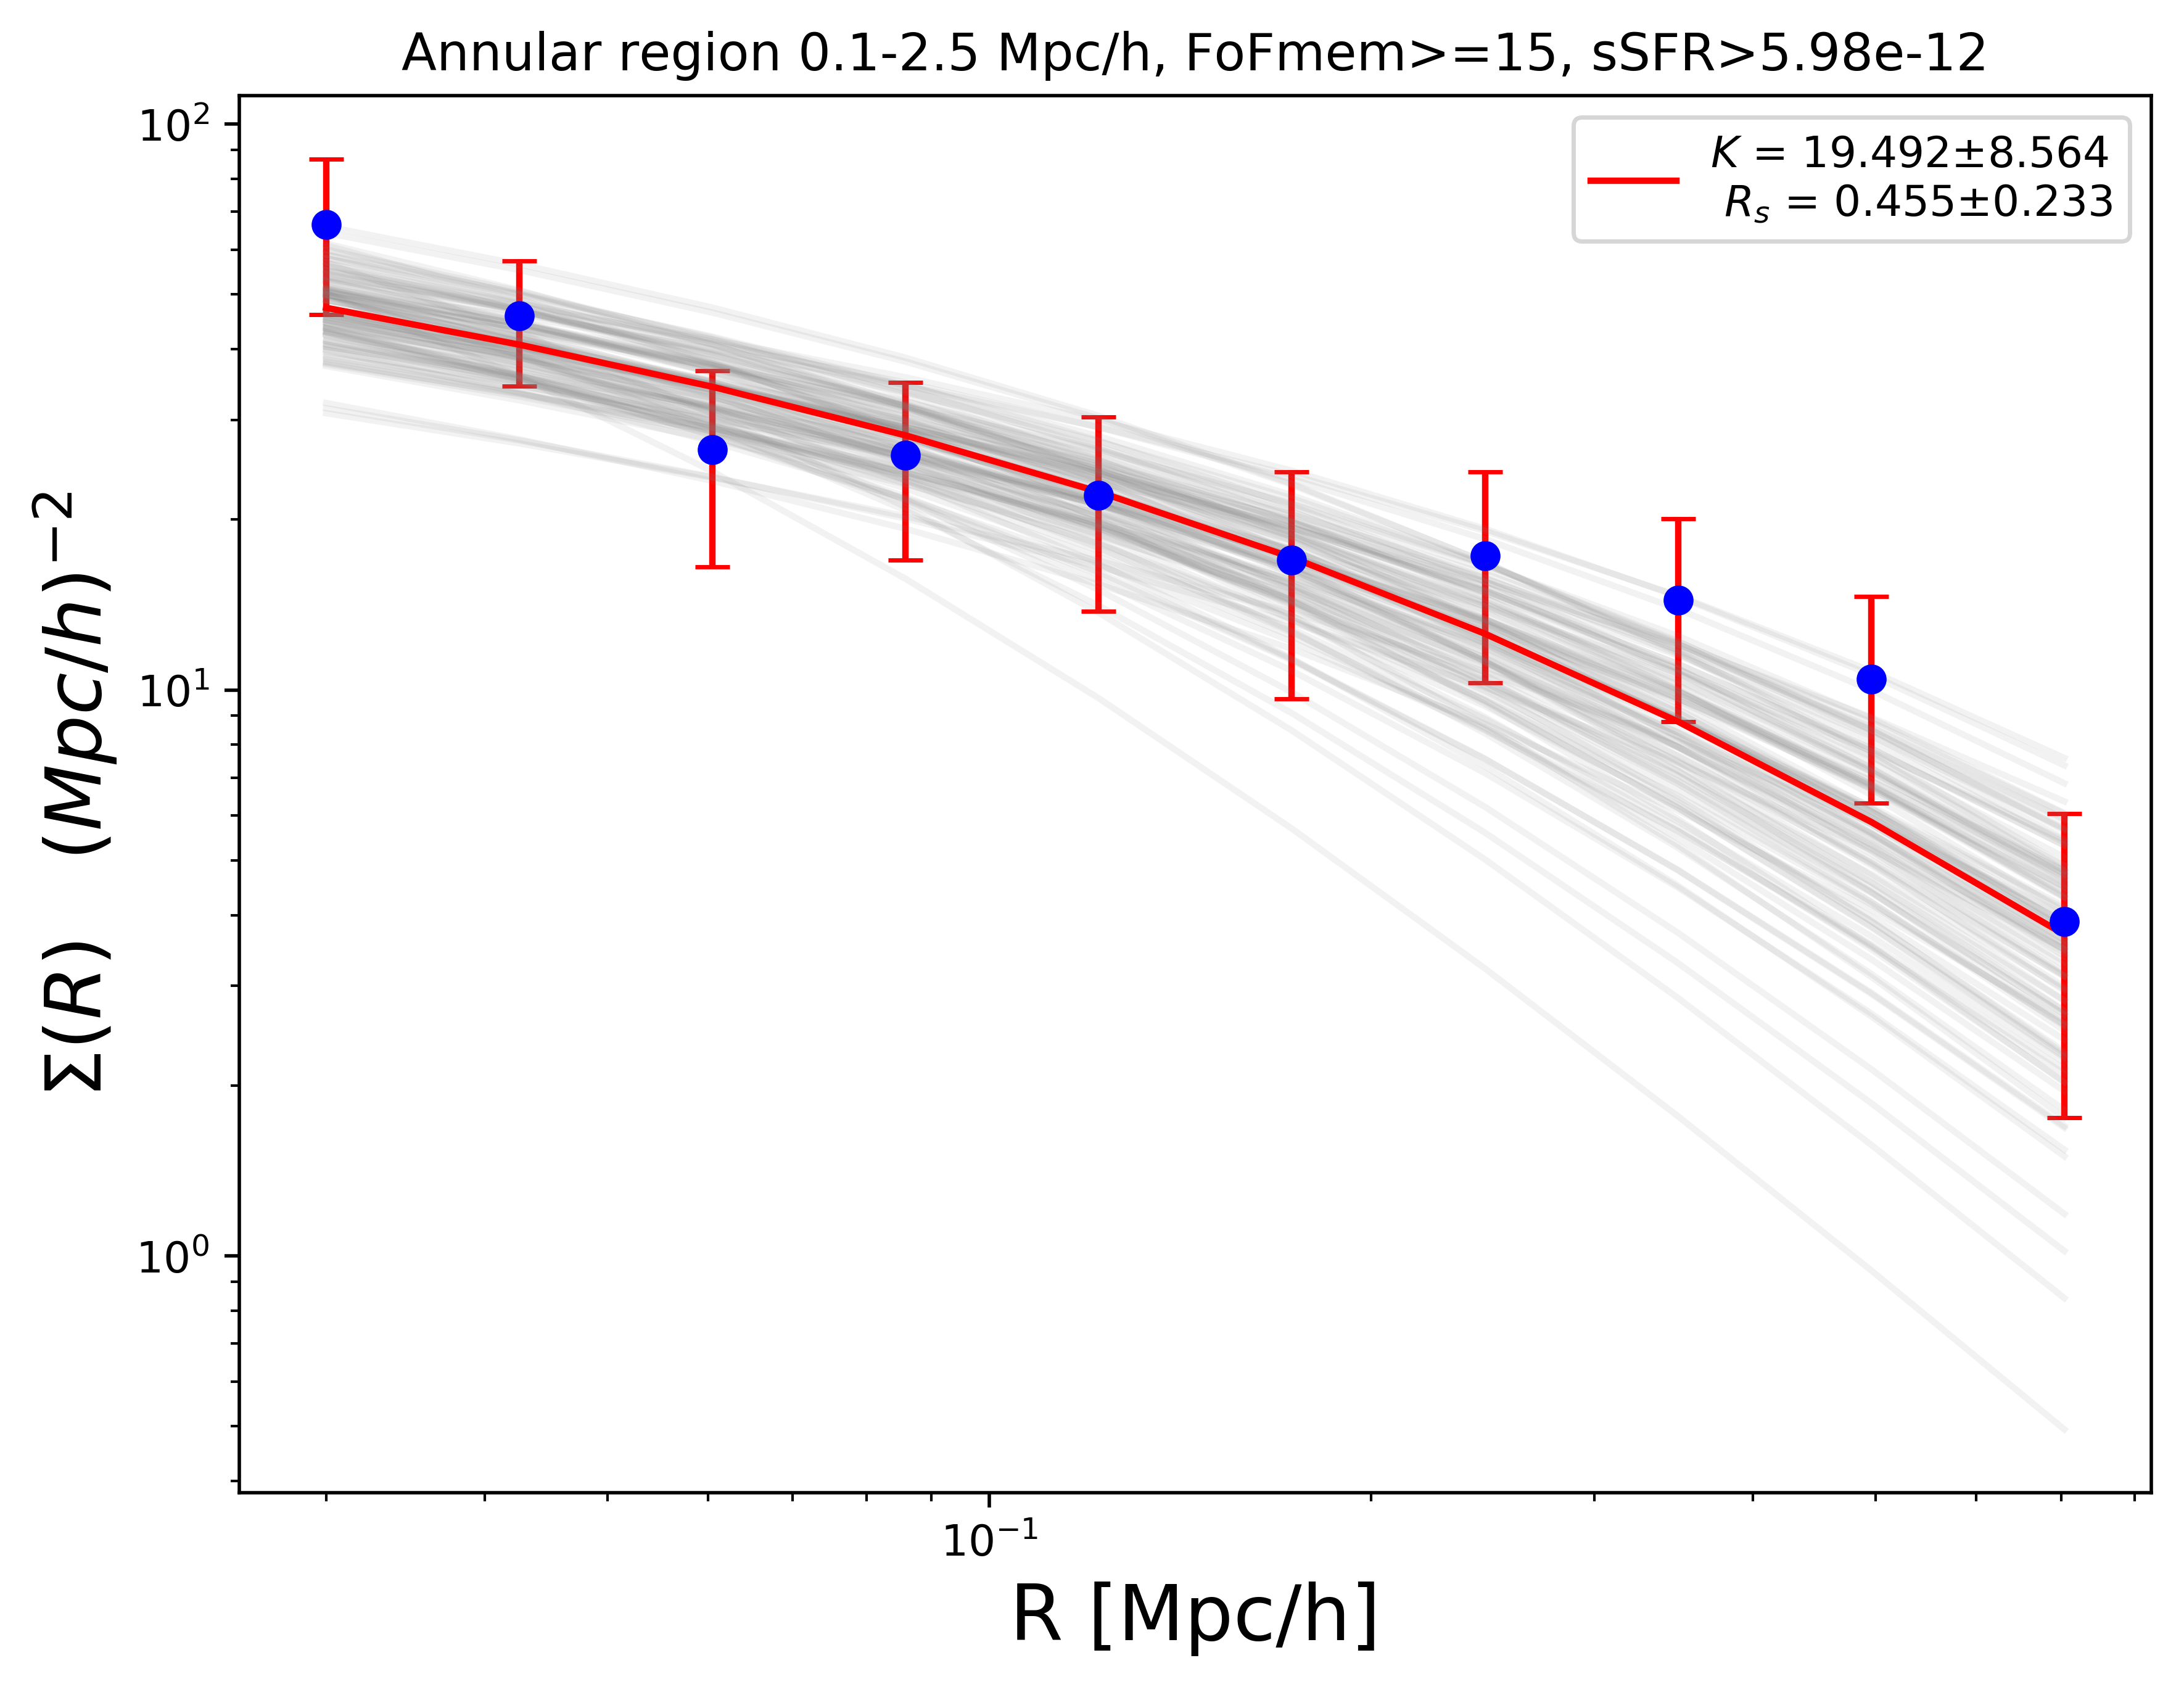

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

# Define nfw profile
def nfw(r, m, c):
    k = m
    r_s = c

    sig = 0.0*r
    c=0
    for i in r:
       
        x = i/r_s
        if x < 1:
            value = (1 - np.arccosh(1/x)/np.sqrt(1-x**2))/(x**2-1)
        elif x > 1:
            value = (1 - np.arccos(1/x)/np.sqrt(x**2-1))/(x**2-1)
        else:
            value = 1./3.
        sig[c] = value*k
        
        c=c+1
        
    return sig
   
# Define the log-likelihood function with Cov matrix
def ln_likelihood(theta, x, y, cov):
    
    m_tot, con_par = theta
    model = nfw(x, m_tot, con_par)
    diff = y - model
    #print(diff)
    #cov = np.diag(np.diag(cov))
    inv_cov = np.linalg.inv(cov)
    chi_squared = np.dot(diff.T, np.dot(inv_cov, diff))
    #print(chi_squared)
    log_like = -0.5 * (chi_squared) # + np.log(np.linalg.det(cov)))
    return log_like

# def ln_likelihood(params, x, y, y_err):
#     m, c = params
#     y_pred = linear_func(x, m, c)
#     residual = y - y_pred
#     chi_squared = np.sum(residual**2 / y_err**2)
#     return -0.5 * chi_squared



# Define the log-prior function
def ln_prior(params):
    m, c = params
    if -10 < m < 100 and 0 < c < 10:
        return 0.0
    return -np.inf

# Define the log-posterior function
def ln_posterior(params, x, y, y_err):
    ln_prior_val = ln_prior(params)
    if not np.isfinite(ln_prior_val):
        return -np.inf
    ln_likelihood_val = ln_likelihood(params, x, y, y_err)
    return ln_prior_val + ln_likelihood_val

y = xi[:10]
x = rb[:10]
y_err = cov_matrix1 #Cij

# Set the number of walkers and steps for the MCMC algorithm
n_walkers = 100
n_steps = 20000

# Set the initial positions of the walkers
initial_pos = np.random.randn(n_walkers, 2)
#rho0 = 20.0 + 1e-4 * np.random.randn(nwalkers)
#rs0 = 0.03 + 1e-4 * np.random.randn(nwalkers)
# initial_pos = np.array([20.0, 0.03]) + 1e-10*np.random.randn(n_walkers, 2)



# Create the sampler
sampler = emcee.EnsembleSampler(n_walkers, 2, ln_posterior, args=(x, y, y_err))

# Run the MCMC sampler
sampler.run_mcmc(initial_pos, n_steps)

# Extract the samples
samples = sampler.get_chain(discard=100, thin=10, flat=True)

# Extract the median values of m and c from the samples
m_median = np.median(samples[:, 0])
c_median = np.median(samples[:, 1])
m_err = np.std(samples[:, 0])
c_err = np.std(samples[:, 1])

m_med = round(m_median, 3)
c_med = round(c_median, 3)

m_er = round(m_err, 3)
c_er = round(c_err, 3)

plt.figure(figsize=(8, 6), dpi=500)

# Print the median values of m and c
print('K:', m_med,'\u00B1', m_er)
print('R_s:', c_med,'\u00B1', c_er)

# Create the plot
plt.errorbar(x, y, stdxi[:10], fmt='o', color='b', ecolor='r', capsize=4)
for m, c in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(x, nfw(x, m, c), color='gray', alpha=0.1)
plt.plot(x, nfw(x, m_median, c_median), 'r-', label=r'$K$ = {}'.format(m_med) + '\u00B1' + '{}'.format(m_er) + '\n $R_s$ = {}'.format(c_med) + '\u00B1' + '{}'.format(c_er))



# Set plot labels and title

plt.title('Annular region 0.1-2.5 Mpc/h, FoFmem>=15, sSFR>5.98e-12' )
plt.xlabel('R [Mpc/h]', fontsize = '18')
plt.ylabel(r'$\Sigma(R) \quad  (Mpc/h)^{-2} $', fontsize = '18')

# plt.xlim(0.025,1.0)
# plt.ylim(0.2,80)
plt.xscale('log')
plt.yscale('log')
# Display the legend and show the plot
plt.legend()
plt.savefig('Sigma_0.3_0.9L.jpg')

plt.show()


In [30]:
xi

array([66.34420856, 45.8215831 , 26.59467297, 25.98084567, 22.06773358,
       16.95509878, 17.27335405, 14.42078438, 10.4614501 ,  3.90096318])

In [31]:
stdxi

array([20.26548858, 11.43154416, 10.08781254,  9.00142502,  8.29321269,
        7.30657341,  6.98199679,  5.62950848,  4.15540879,  2.14691219])